Install libraries, normalise the target with box-cox transform, and prepare data for modeling.
Start with a binarty target split on the median.

In [3]:
import os
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import random

from scipy.stats import stats

#from scipy.special import inv_boxcox


from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, RidgeCV, ElasticNetCV, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix, 
#accuracy_score, roc_curve, roc_auc_score, plot_confusion_matrix, plot_roc_curve,

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, classification_report

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

In [106]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [46]:
df = pd.read_csv('/Users/ksalmon/Desktop/GA/DSI20-lessons/projects/project-capstone/all_merged.csv')

In [47]:
df

,Unnamed: 0,descriptor,complaint_type,zipyear,ppu
0,0,Loud Music/Party,Noise - Residential,104632016,3.407297e+05
1,1,Loud Music/Party,Noise - Residential,100402016,5.457485e+05
2,2,Loud Talking,Noise - Residential,100122016,3.715735e+06
3,3,Loud Music/Party,Noise - Residential,111042016,3.813583e+05
4,4,Loud Music/Party,Noise - Residential,100322016,5.006615e+05
...,...,...,...,...,...
2199944,445752,Loud Music/Party,Noise - Residential,104582017,2.442623e+05
2199945,445753,Loud Music/Party,Noise - Residential,116912017,3.044278e+05
2199946,445754,Banging/Pounding,Noise - Residential,112142017,4.793599e+05
2199947,445755,Loud Music/Party,Noise - Residential,100402017,5.692389e+05


In [48]:
import scipy.stats as scs

In [49]:
# Transformation Box-Cox
price_boxcox, lam = scs.boxcox(df['ppu'])


In [50]:
lam

-0.3063029811540361

In [51]:
pd.Series(price_boxcox).skew()

0.046371716391781954

In [52]:
df['price_transformed'] = price_boxcox

In [53]:
#Get median from transformed prices and create binary labels
median = df['price_transformed'].median()

In [54]:
df['median_transformed'] = [1 if x >= median else 0 for x in price_boxcox]

In [55]:
df

,Unnamed: 0,descriptor,complaint_type,zipyear,ppu,price_transformed,median_transformed
0,0,Loud Music/Party,Noise - Residential,104632016,3.407297e+05,3.198785,0
1,1,Loud Music/Party,Noise - Residential,100402016,5.457485e+05,3.207647,1
2,2,Loud Talking,Noise - Residential,100122016,3.715735e+06,3.233015,1
3,3,Loud Music/Party,Noise - Residential,111042016,3.813583e+05,3.201022,0
4,4,Loud Music/Party,Noise - Residential,100322016,5.006615e+05,3.206119,0
...,...,...,...,...,...,...,...
2199944,445752,Loud Music/Party,Noise - Residential,104582017,2.442623e+05,3.191706,0
2199945,445753,Loud Music/Party,Noise - Residential,116912017,3.044278e+05,3.196470,0
2199946,445754,Banging/Pounding,Noise - Residential,112142017,4.793599e+05,3.205333,0
2199947,445755,Loud Music/Party,Noise - Residential,100402017,5.692389e+05,3.208380,1


In [452]:
#df['multi'] = pd.qcut(df['ppu'], q=4, labels=[1, 2, 3, 4])
#df['multi_transformed'] = pd.qcut(df['price_transformed'], q=4, labels=[1, 2, 3, 4])
#df[df['multi']==1].ppu.describe()
#df[df['multi']==2].ppu.describe()
#df[df['multi']==3].ppu.describe()
#df[df['multi']==4].ppu.describe()
#sns.histplot(df['multi'])
#sns.histplot(df['multi_transformed'])

In [453]:
#df['multi_transformed'] = pd.qcut(df['price_transformed'], q=4, labels=[1, 2, 3, 4])

In [28]:
#df[df['multi']==1].ppu.describe()

In [29]:
#df[df['multi_transformed']==1].ppu.describe()

In [30]:
#df[df['multi']==2].ppu.describe()

In [31]:
#df[df['multi']==3].ppu.describe()

In [32]:
#df[df['multi']==4].ppu.describe()

In [27]:
#sns.histplot(df['multi'])

In [33]:
#sns.histplot(df['multi_transformed'])

In [56]:
transformed_df = df.copy()

In [59]:
#df.drop(columns=['Unnamed: 0','ppu', 'zipyear', 'price_transformed'], inplace=True)

In [60]:
df

,descriptor,complaint_type,median_transformed
0,Loud Music/Party,Noise - Residential,0
1,Loud Music/Party,Noise - Residential,1
2,Loud Talking,Noise - Residential,1
3,Loud Music/Party,Noise - Residential,0
4,Loud Music/Party,Noise - Residential,0
...,...,...,...
2199944,Loud Music/Party,Noise - Residential,0
2199945,Loud Music/Party,Noise - Residential,0
2199946,Banging/Pounding,Noise - Residential,0
2199947,Loud Music/Party,Noise - Residential,1


In [65]:
# Split features

X = df.drop('median_transformed', axis=1)

y = df['median_transformed']

In [75]:
# Dummify features
X = pd.get_dummies(X, columns = ['descriptor', 'complaint_type'], drop_first=True)

Import XGBoost and prepare parameters.

In [77]:
# import XGBoost
import xgboost as xgb

# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)


In [79]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        } 
          
# instantiate the classifier 
xgb_clf_best = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf_best.fit(X_train, y_train, verbose=2)

In [118]:
y_pred = xgb_clf.predict(X_test)

In [119]:
# compute and print accuracy score

from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.6295


In [83]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

Evaluate binary XGBoost

In [87]:
xgb_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.642419,0.000185,0.642419,0.000370
1,0.647510,0.001129,0.647475,0.001371
2,0.654057,0.003645,0.654019,0.003862
3,0.655644,0.001575,0.655605,0.001807
4,0.657423,0.000442,0.657407,0.000838
5,0.658422,0.000962,0.658416,0.000474
6,0.657721,0.000508,0.657652,0.000658
7,0.657932,0.000360,0.657913,0.000388
8,0.659020,0.001749,0.658969,0.001590
9,0.659983,0.001319,0.659936,0.000703


Text(0.5, 0, 'Round')

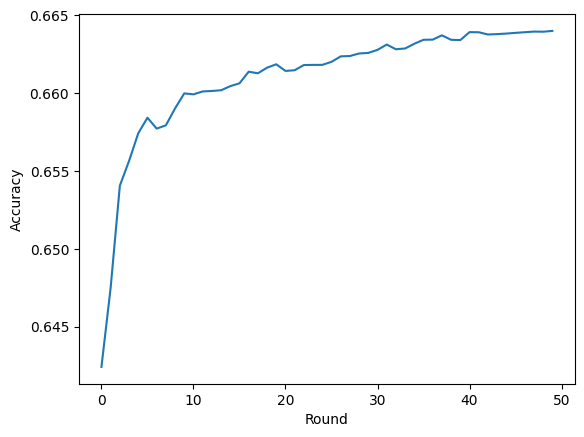

In [88]:
plt.plot(xgb_cv.iloc[:,0])
plt.ylabel("Accuracy")
plt.xlabel('Round')

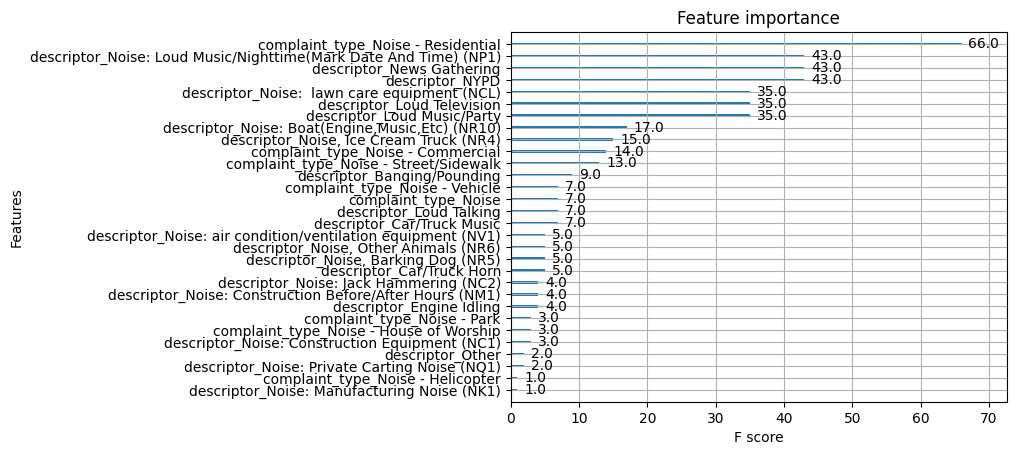

<Figure size 1600x1200 with 0 Axes>

In [89]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

In [129]:
from sklearn.metrics import precision_score

In [130]:
from sklearn.metrics import recall_score

In [131]:
from sklearn.metrics import f1_score

In [186]:
print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test, y_pred))

print('\n-------------------- Key Metrics --------------------')
print('\nAccuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test, y_pred))
print('---------------------- XGBoost ----------------------') # unnecessary fancy styling


------------------ Confusion Matrix -----------------

[[232222  94575]
 [150106 183082]]

-------------------- Key Metrics --------------------

Accuracy: 0.6293
Micro Precision: 0.6293
Micro Recall: 0.6293
Micro F1-score: 0.6293

Macro Precision: 0.6334
Macro Recall: 0.6300
Macro F1-score: 0.6272

Weighted Precision: 0.6336
Weighted Recall: 0.6293
Weighted F1-score: 0.6269

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       0.61      0.71      0.65    326797
           1       0.66      0.55      0.60    333188

    accuracy                           0.63    659985
   macro avg       0.63      0.63      0.63    659985
weighted avg       0.63      0.63      0.63    659985

---------------------- XGBoost ----------------------


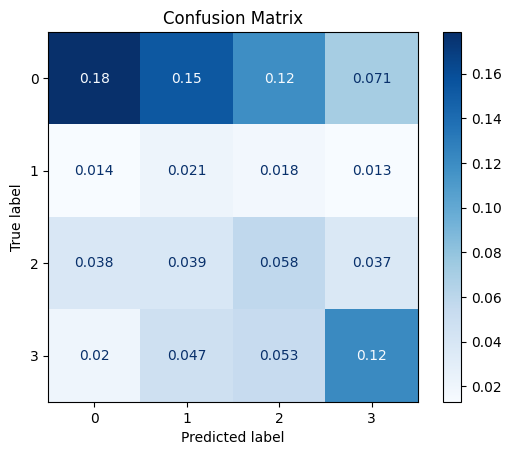

In [248]:
ConfusionMatrixDisplay.from_predictions(y_pred, 
                                        y_test, cmap='Blues', normalize='all')

       
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn import metrics
def buildROC(target_test,test_preds):
    fpr, tpr, threshold = metrics.roc_curve(target_test, test_preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('XGBoost binary classification')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')

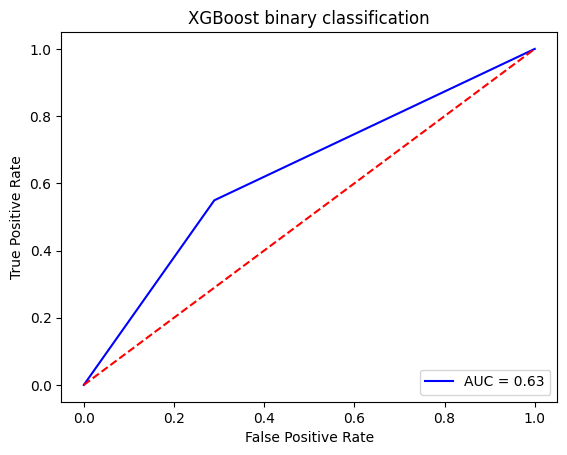

In [138]:
buildROC(y_test, y_pred)

In [180]:
from sklearn.metrics import precision_recall_curve

In [ ]:
Use precisionRecall for multiclass XGBoost

In [184]:
def PrecisionRecall(y, ypred):
    '''Plot precision and recall plot based on test and predicted target values'''
    precision, recall, thresholds = precision_recall_curve(y, ypred)
    plt.figure(figsize = (8,8))
    plt.plot(recall, precision)
    plt.plot([0, 1], [0.5, 0.5], linestyle = '--')  #baseline
    plt.xlabel('Recall', fontsize = 10)
    plt.ylabel('Precision', fontsize = 10)
    plt.title('XGBoost Precision-Recall Curve', fontsize = 14)

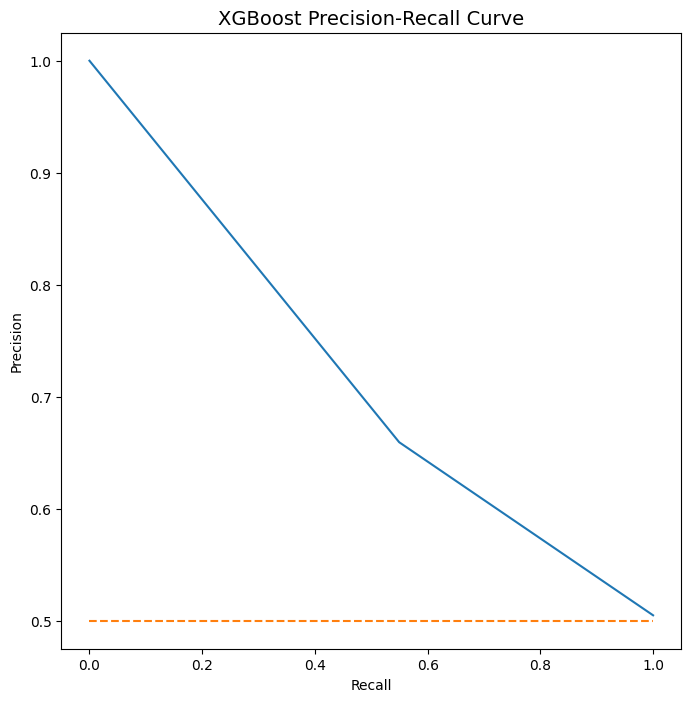

In [185]:
PrecisionRecall(y_test, y_pred)

Run bindary model with Bayesian Optimization with HYPEROPT.


<!-- HYPEROPT is a powerful python library that search through an hyperparameter space of values and find the best possible values that yield the minimum of the loss function.

Bayesian Optimization technique uses Hyperopt to tune the model hyperparameters. Hyperopt is a Python library which is used to tune model hyperparameters.

More information on Hyperopt can be found at the following link:-

https://hyperopt.github.io/hyperopt/?source=post_page --> -->

In [ ]:
# Initialize domain space for range of values 

In [96]:
from hyperopt import uniform

ImportError: cannot import name 'uniform' from 'hyperopt' (/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/hyperopt/__init__.py)

In [108]:
space={'max_depth': hp.quniform("max_depth", 3, 5, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 100,
        'seed': 0
    }

In [109]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [110]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 30,
                        trials = trials)

SCORE:                                                                          
0.6266218171625113                                                              
  3%|▎        | 1/30 [00:28<13:58, 28.92s/trial, best loss: -0.6266218171625113]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266112108608529                                                              
  7%|▌        | 2/30 [01:00<14:14, 30.51s/trial, best loss: -0.6266218171625113]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266218171625113                                                              
 10%|▉        | 3/30 [01:35<14:37, 32.51s/trial, best loss: -0.6266218171625113]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266218171625113                                                              
 13%|█▏       | 4/30 [02:05<13:45, 31.74s/trial, best loss: -0.6266218171625113]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266263627203649                                                              
 17%|█▌       | 5/30 [02:39<13:29, 32.37s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266218171625113                                                              
 20%|█▊       | 6/30 [03:10<12:42, 31.78s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266112108608529                                                              
 23%|██       | 7/30 [03:38<11:46, 30.71s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266218171625113                                                              
 27%|██▍      | 8/30 [04:07<11:01, 30.06s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266263627203649                                                              
 30%|██▋      | 9/30 [04:35<10:21, 29.60s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266112108608529                                                              
 33%|██▋     | 10/30 [05:13<10:43, 32.17s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266218171625113                                                              
 37%|██▉     | 11/30 [05:42<09:51, 31.13s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266263627203649                                                              
 40%|███▏    | 12/30 [06:10<09:04, 30.23s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266112108608529                                                              
 43%|███▍    | 13/30 [06:37<08:18, 29.31s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266218171625113                                                              
 47%|███▋    | 14/30 [07:06<07:47, 29.23s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266218171625113                                                              
 50%|████    | 15/30 [07:35<07:15, 29.06s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266112108608529                                                              
 53%|████▎   | 16/30 [08:03<06:41, 28.67s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266112108608529                                                              
 57%|████▌   | 17/30 [08:31<06:09, 28.45s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266112108608529                                                              
 60%|████▊   | 18/30 [08:59<05:40, 28.34s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266218171625113                                                              
 63%|█████   | 19/30 [09:26<05:07, 27.92s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266218171625113                                                              
 67%|█████▎  | 20/30 [09:53<04:36, 27.68s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266263627203649                                                              
 70%|█████▌  | 21/30 [10:21<04:09, 27.71s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266263627203649                                                              
 73%|█████▊  | 22/30 [10:48<03:40, 27.57s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266263627203649                                                              
 77%|██████▏ | 23/30 [11:15<03:12, 27.50s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266263627203649                                                              
 80%|██████▍ | 24/30 [11:43<02:44, 27.45s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266112108608529                                                              
 83%|██████▋ | 25/30 [12:10<02:17, 27.50s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266263627203649                                                              
 87%|██████▉ | 26/30 [12:40<01:52, 28.18s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266263627203649                                                              
 90%|███████▏| 27/30 [13:09<01:25, 28.38s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266112108608529                                                              
 93%|███████▍| 28/30 [13:38<00:57, 28.71s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266263627203649                                                              
 97%|███████▋| 29/30 [14:07<00:28, 28.59s/trial, best loss: -0.6266263627203649]

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                          
0.6266112108608529                                                              
100%|████████| 30/30 [14:36<00:00, 29.23s/trial, best loss: -0.6266263627203649]


In [116]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7998875394609944, 'gamma': 2.1070992010563954, 'max_depth': 5.0, 'min_child_weight': 5.0, 'reg_alpha': 44.0, 'reg_lambda': 0.8895311674601302}


In [117]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {'colsample_bytree': 0.7998875394609944, 'gamma': 2.1070992010563954, 
          'max_depth': 5, 'min_child_weight': 5, 'reg_alpha': 44, 
          'reg_lambda': 0.8895311674601302}  
          
# instantiate the classifier 
xgb_clf_best = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf_best.fit(X_test, y_test, verbose=2)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7998875394609944, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2.1070992010563954, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [120]:
print(xgb_clf_best)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7998875394609944, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2.1070992010563954, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)


In [122]:
y_pred_best = xgb_clf_best.predict(X_test)

In [123]:
# compute and print accuracy score

from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_best)))

XGBoost model accuracy score: 0.6293


Try XGboost with multi class

In [212]:
df = transformed_df.copy()

In [213]:
df['multi_transformed'] = pd.qcut(df['price_transformed'], q=4, labels=[0, 1, 2, 3])


<AxesSubplot: xlabel='multi_transformed', ylabel='Count'>

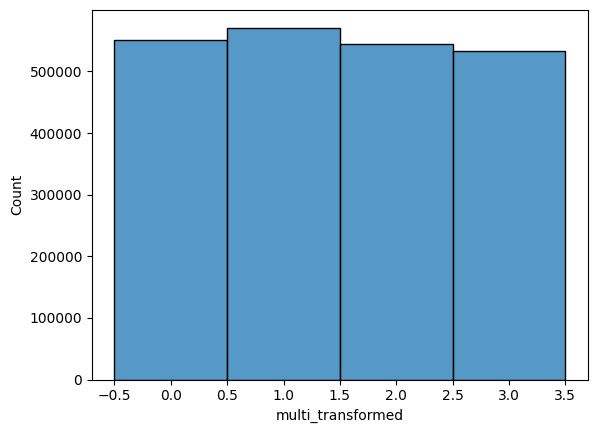

In [214]:
sns.histplot(df['multi_transformed'])

In [215]:
df.columns

Index(['Unnamed: 0', 'descriptor', 'complaint_type', 'zipyear', 'ppu',
       'price_transformed', 'median_transformed', 'multi_transformed'],
      dtype='object')

In [216]:
df.drop(columns=['Unnamed: 0','ppu', 'zipyear', 'price_transformed', 'median_transformed'], inplace=True)

In [217]:
# Split features

X = df.drop('multi_transformed', axis=1)

y = df['multi_transformed']

In [222]:
X

,descriptor,complaint_type
0,Loud Music/Party,Noise - Residential
1,Loud Music/Party,Noise - Residential
2,Loud Talking,Noise - Residential
3,Loud Music/Party,Noise - Residential
4,Loud Music/Party,Noise - Residential
...,...,...
2199944,Loud Music/Party,Noise - Residential
2199945,Loud Music/Party,Noise - Residential
2199946,Banging/Pounding,Noise - Residential
2199947,Loud Music/Party,Noise - Residential


In [223]:
X = pd.get_dummies(X, columns = ['descriptor', 'complaint_type'], drop_first=True)

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [219]:
# import XGBoost
import xgboost as xgb

# define data_dmatrix
#data_dmatrix = xgb.DMatrix(data=X,label=y)

In [225]:
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', 
                            num_class=3, 
                            missing=1, 
                            early_stopping_rounds=10, 
                            eval_metric=['merror','mlogloss'], 
                            seed=42)
xgb_clf.fit(X_train, 
            y_train,
            verbose=1, # set to 1 to see xgb training round intermediate results
            eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-merror:0.62189	validation_0-mlogloss:1.35524	validation_1-merror:0.62186	validation_1-mlogloss:1.35515
[1]	validation_0-merror:0.62192	validation_0-mlogloss:1.33628	validation_1-merror:0.62188	validation_1-mlogloss:1.33612
[2]	validation_0-merror:0.62212	validation_0-mlogloss:1.32439	validation_1-merror:0.62214	validation_1-mlogloss:1.32415
[3]	validation_0-merror:0.62158	validation_0-mlogloss:1.31636	validation_1-merror:0.62160	validation_1-mlogloss:1.31606
[4]	validation_0-merror:0.62155	validation_0-mlogloss:1.31122	validation_1-merror:0.62149	validation_1-mlogloss:1.31090
[5]	validation_0-merror:0.62155	validation_0-mlogloss:1.30775	validation_1-merror:0.62149	validation_1-mlogloss:1.30740
[6]	validation_0-merror:0.62155	validation_0-mlogloss:1.30544	validation_1-merror:0.62149	validation_1-mlogloss:1.30505
[7]	validation_0-merror:0.62148	validation_0-mlogloss:1.30381	validation_1-merror:0.62145	validation_1-mlogloss:1.30343
[8]	validation_0-merror:0.62155	validati

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=1,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=3, num_parallel_tree=None, objective='multi:softmax', ...)

In [229]:

# preparing evaluation metric plots
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)


## ---------- Model Classification Report ----------
## get predictions and create model quality report

y_pred = xgb_clf.predict(X_test)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test, y_pred))

print('\n-------------------- Key Metrics --------------------')
print('\nAccuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test, y_pred))
print('---------------------- XGBoost ----------------------') # unnecessary fancy styling


------------------ Confusion Matrix -----------------

[[98225  7507 20909 11245]
 [84059 11715 21322 25697]
 [65449  9684 31694 29377]
 [38982  7202 20229 66692]]

-------------------- Key Metrics --------------------

Accuracy: 0.3788
Micro Precision: 0.3788
Micro Recall: 0.3788
Micro F1-score: 0.3788

Macro Precision: 0.3763
Macro Recall: 0.3820
Macro F1-score: 0.3425

Weighted Precision: 0.3748
Weighted Recall: 0.3788
Weighted F1-score: 0.3394

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       0.34      0.71      0.46    137886
           1       0.32      0.08      0.13    142793
           2       0.34      0.23      0.28    136204
           3       0.50      0.50      0.50    133105

    accuracy                           0.38    549988
   macro avg       0.38      0.38      0.34    549988
weighted avg       0.37      0.38      0.34    549988

---------------------- XGBoost ----------------------
